<a href="https://colab.research.google.com/github/sahilaf/Ai-lab/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

**EDA Steps**

Here's a structured approach to Exploratory Data Analysis:

### Step 1: Understand the Data
- View initial rows and columns: Use `.head()`, `.tail()`, `.shape`.
- Examine data types and non-null values: Use `.info()`.
- Identify columns and their data types.

### Step 2: Summary Statistics
- Calculate descriptive statistics: Use `.describe()`. This includes mean, median, mode, standard deviation, min, max, and quartiles for numerical data.
- Understand the spread and central tendency of the data.

### Step 3: Value Counts
- Check unique values and their frequencies in columns: Use `.value_counts()`.
- Identify potential duplicates or inconsistencies in categorical data.
- Example: `df['column_name'].value_counts()`

### Step 4: Missing Value Analysis
- Identify where data is missing: Use `.isnull()`.
- Calculate the percentage of missing data per column: Use `.isnull().sum() / len(df) * 100`.
- Understand the extent and location of gaps in the dataset.

### Step 5: Visualizations
- **Histograms**: Show the distribution of numerical variables. Example: `df['numerical_column'].hist()`
- **Boxplots**: Identify outliers and understand the spread of numerical data. Example: `df.boxplot(column='numerical_column')`
- **Bar plots**: Compare categories. Example: `df['categorical_column'].value_counts().plot(kind='bar')`
- **Correlation Heatmaps**: Visualize linear relationships between numerical features. Example: `sns.heatmap(df.corr(), annot=True)` (Requires importing `seaborn`)
- **Scatter Plots**: Explore bivariate relationships between two numerical variables. Example: `df.plot(kind='scatter', x='column1', y='column2')`

### Step 6: Target Variable Exploration
- Analyze the distribution of the target variable.
- Explore how the target variable relates to other features using visualizations and summary statistics.

# Data Cleaning


Strategies to handle common data cleaning issues:

### 1. Handle Missing Values

- **Drop missing rows/columns**: If the number of missing values is very small or the column is not essential. Use `df.dropna()`.
- **Impute missing values**:
    - **Numerical data**: Fill with the mean or median. Example: `df['numerical_column'].fillna(df['numerical_column'].mean())`
    - **Categorical data**: Fill with the mode. Example: `df['categorical_column'].fillna(df['categorical_column'].mode()[0])`
    - **Advanced methods**: Consider using linear regression, KNN, or interpolation for more sophisticated imputation (for future learning).

### 2. Remove Duplicates
- Detect and drop exact duplicate rows: Use `df.drop_duplicates()`.

### 3. Fix Data Types
- Convert columns to the correct data types (e.g., from object to datetime or numerical). Example: `pd.to_datetime(df['date_column'])` or `df['numerical_column'].astype(int)`

### 4. Handle Inconsistent Categories
- Clean up categorical values to ensure uniformity (e.g., 'USA', 'U.S.A.', and 'United States' should be consistent). This might involve using string manipulation methods.

### 5. Detect and Handle Outliers
- **Detection**: Use visualizations like boxplots, or statistical methods like the Interquartile Range (IQR) or Z-score.
- **Handling**: Remove outliers (if they are errors) or cap them at a certain value. Example (capping using IQR): `Q1 = df['column'].quantile(0.25)`, `Q3 = df['column'].quantile(0.75)`, `IQR = Q3 - Q1`, `upper_bound = Q3 + 1.5 * IQR`, `df['column'] = df['column'].clip(upper=upper_bound)`

### 6. Fix Logical or Domain Errors
- Address values that are incorrect based on domain knowledge (e.g., a negative age, or a purchase date before the product was released). This often requires conditional logic to identify and correct these values.

# Data Preprocessing


Data preprocessing is a crucial step to prepare your data for machine learning models.

### 1. Encoding Categorical Variables
- Convert text labels into numerical representations that machine learning algorithms can understand.

#### Methods:
1. **Label Encoding (Ordinal)**:
   - Good for ordered categorical variables where there is a natural ranking (e.g., "low", "medium", "high"). Assigns a unique integer to each category.
   - Example: Encoding 'size' column: `from sklearn.preprocessing import LabelEncoder`, `le = LabelEncoder()`, `df['size_encoded'] = le.fit_transform(df['size'])`

2. **One-Hot Encoding (Nominal)**:
   - For non-ordered categorical variables where there is no inherent ranking (e.g., 'region', 'color'). Creates new binary columns for each category.
   - Example: Encoding 'color' column: `pd.get_dummies(df['color'])` or `from sklearn.preprocessing import OneHotEncoder`, `ohe = OneHotEncoder()`, `encoded_data = ohe.fit_transform(df[['color']])`

### 2. Feature Transformation
- Used to handle skewed data distributions (e.g., right-skewed or left-skewed data) or to meet the assumptions of certain models.
- Common transformations include logarithmic transformation, square root transformation, or Box-Cox transformation.
- Example (Log transform): `import numpy as np`, `df['skewed_column_log'] = np.log(df['skewed_column'])`

### 3. Feature Scaling
- Standardize the range of independent features. This is important for algorithms that are sensitive to the scale of the input data (e.g., gradient descent-based algorithms, KNN, SVMs).
- Converts all features to a similar scale, often between 0 and 1 or with a mean of 0 and standard deviation of 1.

#### Methods:
1. **Min-Max Scaling**: Scales features to a fixed range, usually 0 to 1. Example: `from sklearn.preprocessing import MinMaxScaler`, `scaler = MinMaxScaler()`, `df[['column1', 'column2']] = scaler.fit_transform(df[['column1', 'column2']])`


2. **Standardization (Z-score scaling)**: Scales features to have a mean of 0 and a standard deviation of 1. Example: `from sklearn.preprocessing import StandardScaler`, `scaler = StandardScaler()`, `df[['column1', 'column2']] = scaler.fit_transform(df[['column1', 'column2']])`

# Feature Engineering

Creating new features or transforming existing ones to expose useful patterns that ML models can learn from.

## Common techniques:
- Mathematical Combinations
- Target-Based flags
- Binning
- Time-based features

# Feature Selection

Selecting the most useful features and removing the rest.

**Why is it important?**
- Reduces noise and overfitting
- Speeds up traning
- Impoves accuracy
- Makes model interpretation easier

## Methods:
### **1. Filter methods (Pure Stat)**
- Correlation Matrix -> remove highly correlated features
- Chi-square test (categorical vs cetagorical)
- Anova F-test (numerical vs categorical target)

### **2. Embedded methods (Selection build into the model)**
- Lasso Regression -> Shrinks coefficients to 0
- Tree-based models (random forest,xgboost) -> feature importance scores.



# **Practical**

## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data load

In [3]:
df = pd.read_csv('insurance.csv')

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **EDA**

In [6]:
df.shape

(1338, 7)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

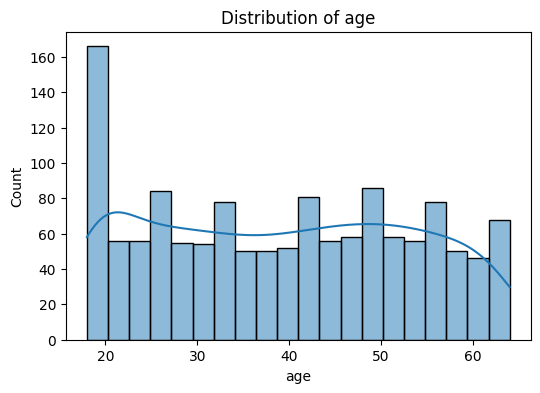

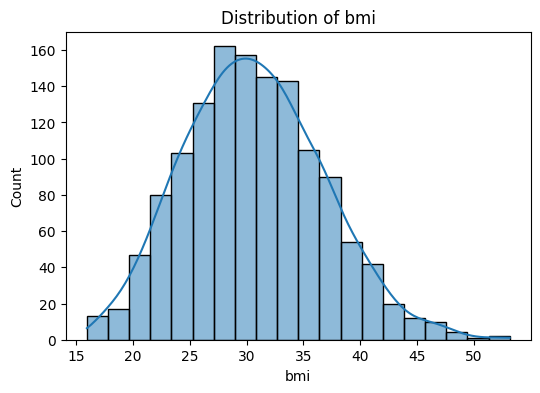

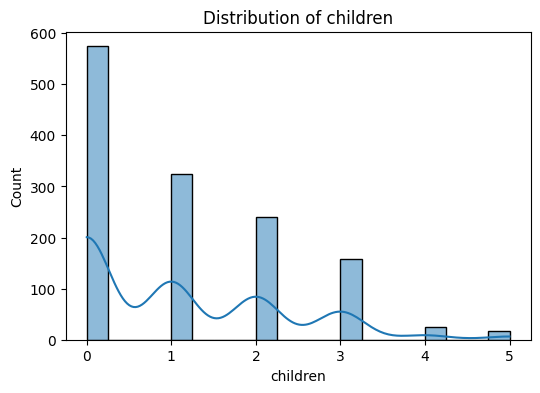

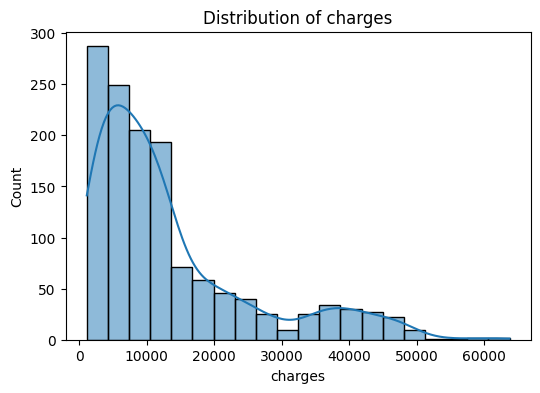

In [15]:
numeric_columns = ['age', 'bmi', 'children', 'charges']

for col in numeric_columns:
  plt.figure(figsize=(6, 4))
  sns.histplot(df[col], kde=True, bins =20)
  plt.title(f'Distribution of {col}')
  plt.show()

<Axes: xlabel='children', ylabel='count'>

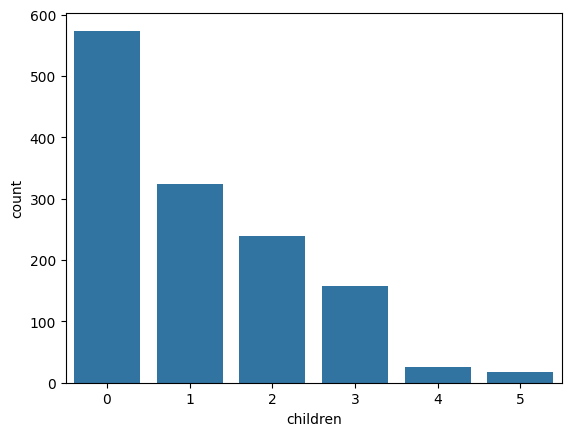

In [16]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

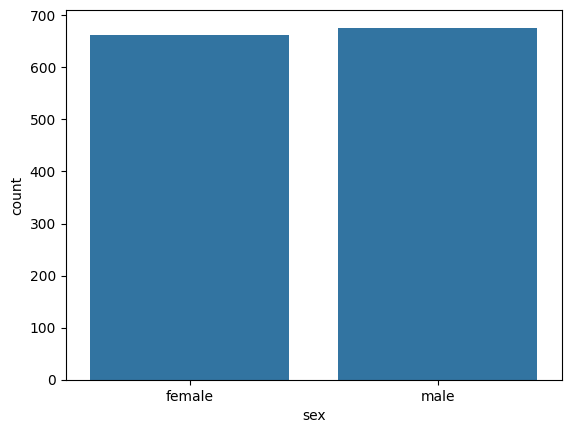

In [17]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

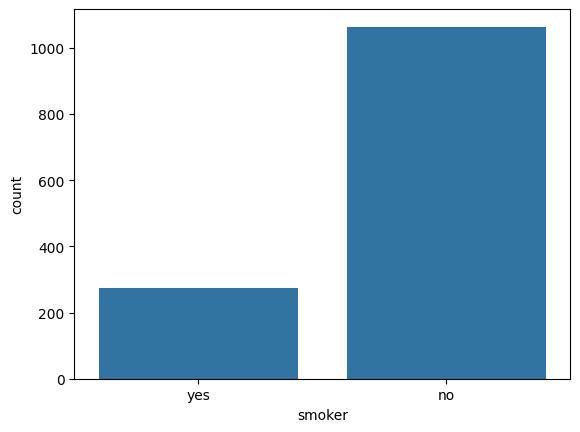

In [18]:
sns.countplot(x=df['smoker'])

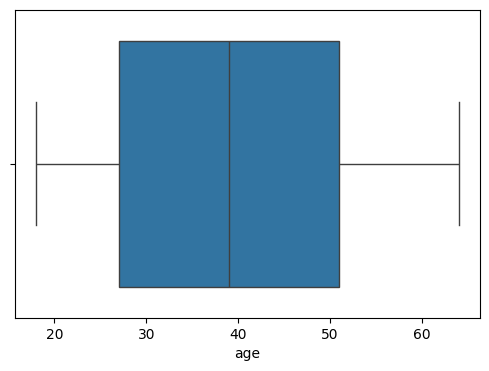

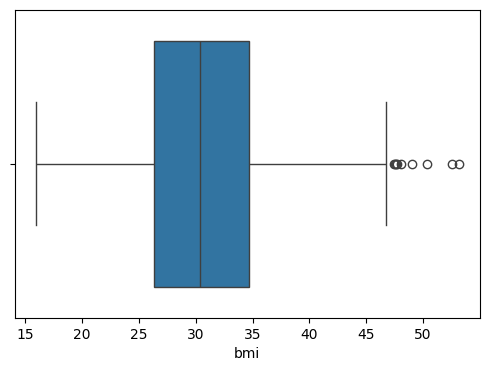

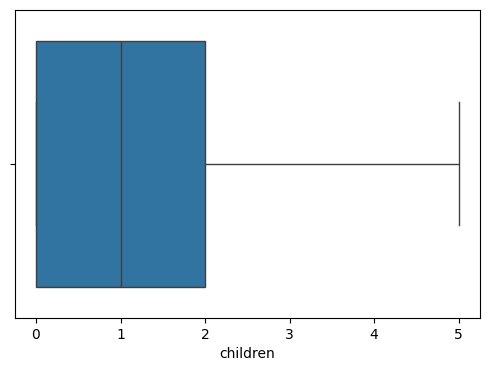

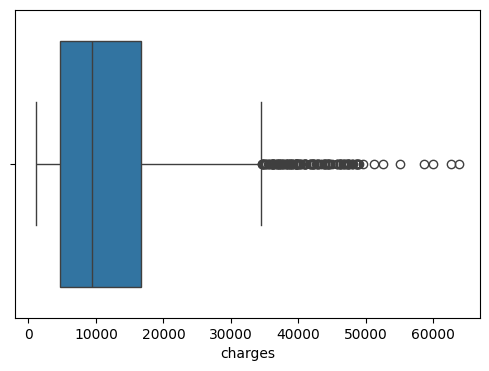

In [19]:
for col in numeric_columns:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x= df[col])

<Axes: >

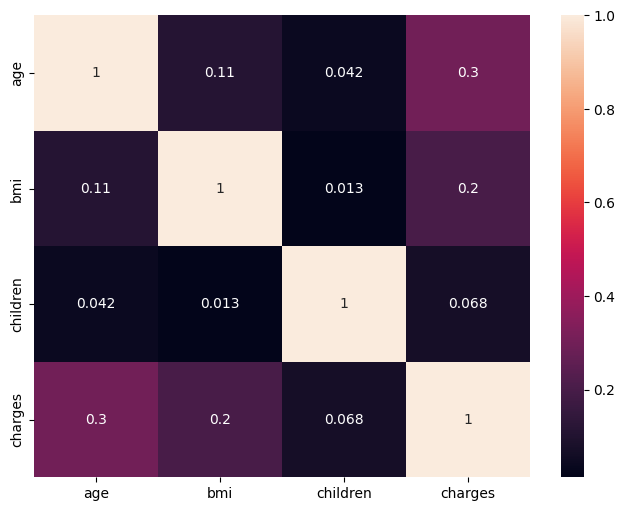

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data clean and pre processing

In [22]:
df_cleaned = df.copy()

In [23]:
df_cleaned.drop_duplicates(inplace=True)

In [24]:
df_cleaned.shape

(1337, 7)

In [25]:
df_cleaned.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [26]:
df_cleaned.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64
